# Thera Bank Personal Loan Campaign
 
## Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

## Domain: Banking

 

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Attribute Information:
ID: Customer ID

Age: Customer's age in completed years

Experience: #years of professional experience

Income: Annual income of the customer ($000)

ZIP Code: Home Address ZIP

Family: Family size of the customer

CCAvg: Avg. spending on credit cards per month ($000)

Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage: Value of house mortgage if any. ($000)

Personal Loan: Did this customer accept the personal loan offered in the last campaign?

Securities Account: Does the customer have a securities account with the bank?

CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Does the customer use internet banking facilities?

Credit card: Does the customer use a credit card issued by the bank?


## Import Libraries
Check Dataype, Summary, Shape, null values

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt ## plots
%matplotlib inline
import seaborn as sns # seaborn visualizations
from sklearn.model_selection import train_test_split # sklearn lib to split data into training and test data set
from sklearn import metrics #sklearn lib to derive metrics of model

In [2]:
#lib to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv') # creating dataframe from data.

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<AxesSubplot:>

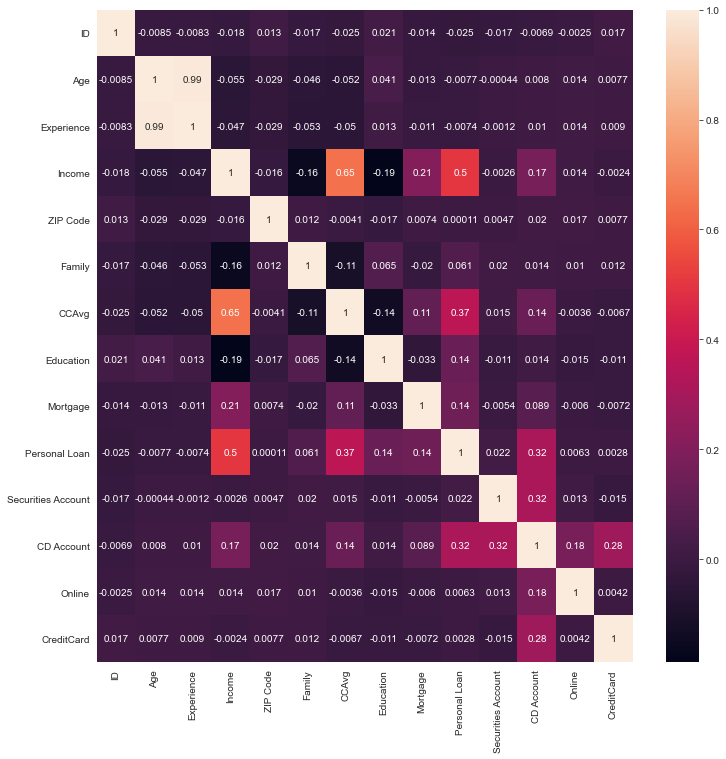

In [6]:
sns.set({
    'figure.figsize':(12,12)
})
sns.heatmap(df.corr(), annot=True) 

In [7]:
# checking for nulls
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There seems to be no null values in the data set. This is good, need to check if there are any missing value that have 0 values.

In [8]:
df.shape

(5000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


From the above we can see there are 5000 records in the data set. There are no null values.

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Findings
Experience has a min of -3.0 which cannot/should not happen. Minimum experience one can have is 0. Will need to impute this.

### EDA

In [11]:
df.nunique() #number of unique values for each column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Nothing stands out here. The data set seems to have correct unique values based on the data description. For example - a customer either has a Securities Account or does not so only 2 possible unique values etc.

ID column has 5000 entries so it is a continous column and has 1-1 mapping. This can be dropped later.

In [12]:
lcdf = df.drop('ID', axis=1) # dropping ID column as it is not needed
lcdf.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
#finding total number of people with 0 mortgage
print('Total number of customers with no mortgage',len(lcdf[lcdf['Mortgage']==0].index))

Total number of customers with no mortgage 3462


In [14]:
#finding total number of people with 0 mortgage
print('Total number of customers with no credit card spending',len(lcdf[lcdf['CCAvg']==0].index))

Total number of customers with no credit card spending 106


### Findings

A large percentage of customers do not have Mortgage while there are only few customers we do not use credit cards. The zip code  data shows there are 467 unique zip codes and that there is skewness in zip code as well, where customers from certain zip code are considerably more than from other zip codes.

In [15]:
#converting variables to category 
lcdf['ZIP Code'] = lcdf['ZIP Code'].astype('category')
lcdf['Family'] = lcdf['Family'].astype('category')
lcdf['Education'] = lcdf['Education'].astype('category')
lcdf['Personal Loan'] = lcdf['Personal Loan'].astype('category')
lcdf['Securities Account'] = lcdf['Securities Account'].astype('category')
lcdf['CD Account'] = lcdf['CD Account'].astype('category')
lcdf['Online'] = lcdf['Online'].astype('category')
lcdf['CreditCard'] = lcdf['CreditCard'].astype('category')

In [16]:
for i in list(lcdf.columns[lcdf.dtypes == 'category']):
    print(lcdf[i].value_counts(normalize='True'))
    print()

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
92694    0.0002
94965    0.0002
94970    0.0002
91024    0.0002
9307     0.0002
Name: ZIP Code, Length: 467, dtype: float64

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



### Univariate Analysis

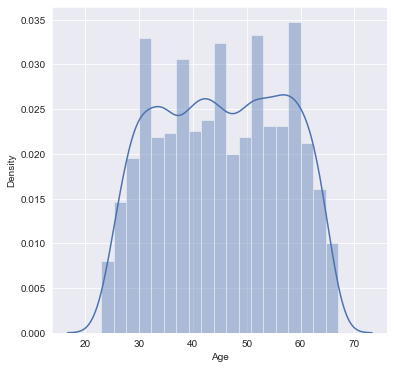

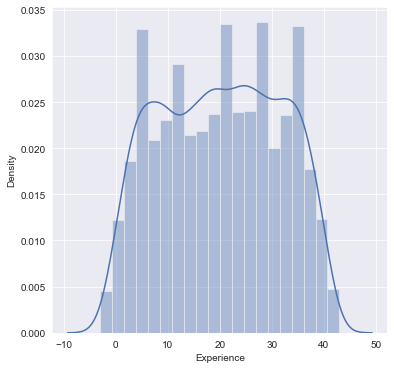

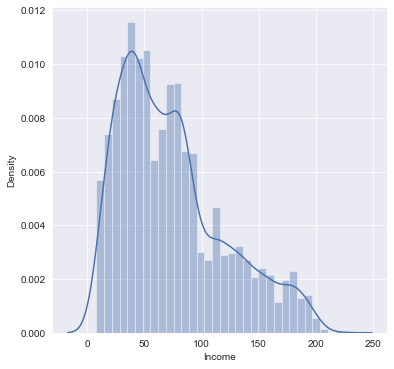

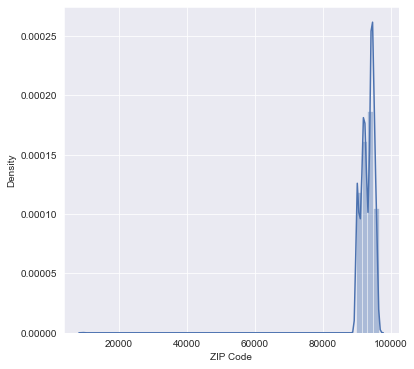

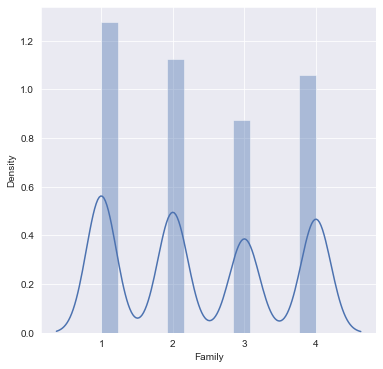

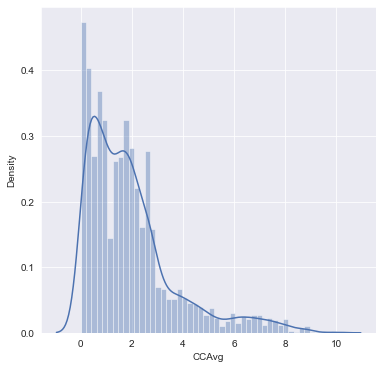

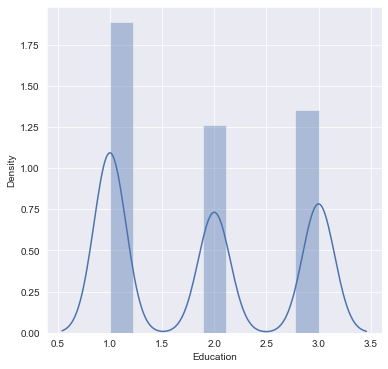

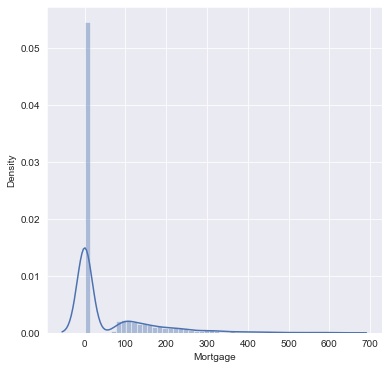

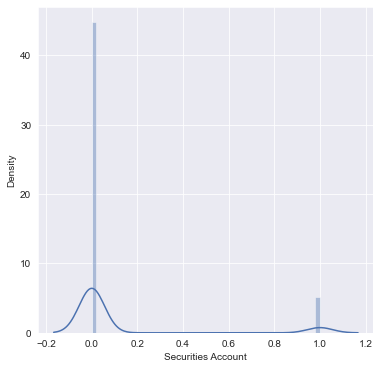

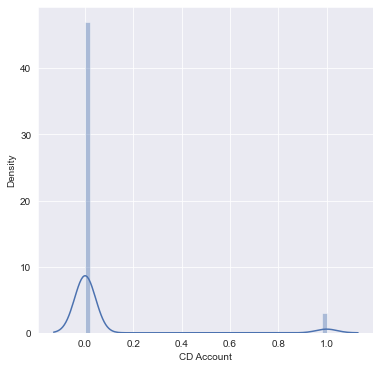

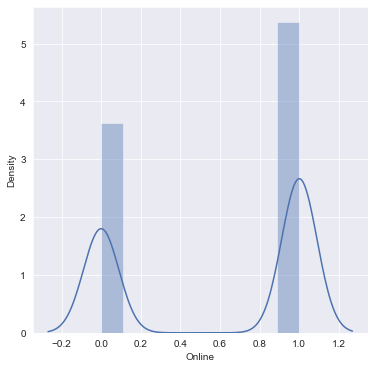

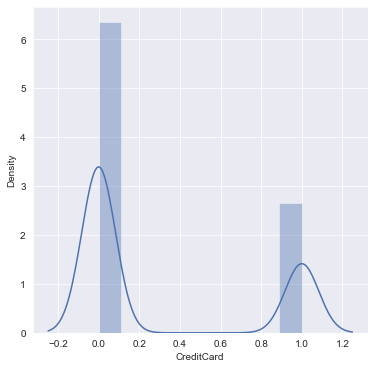

In [17]:
column_list = list(lcdf)
column_list.remove('Personal Loan')
#distplot for each attribute

sns.set({
    'figure.figsize':(6,6)
})
for i in column_list:
    sns.distplot(lcdf[i])
    plt.show()

### Findings
Age seems to have even distribution.

Experience has even distribution but there is a negative value which will need to be treated before model training.

Income has some skewness but this is expected. We will not treat this initially but may explore if normalizing this column helps improve model performance

Credit Card Avg too has skewness, again this is expected.

Education - There seesm to be more Undergrad's.

Mortgage - Shows most of customers do not house mortgage.

In [18]:
y_dist = lcdf['Personal Loan'].value_counts()

In [19]:
y_dist

0    4520
1     480
Name: Personal Loan, dtype: int64

### Treatings Values


In [20]:
lcdf[lcdf['Experience'] < 0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [21]:
lcdf['Experience'].mode()

0    32
dtype: int64

In [22]:
lcdf['Experience'].mean()

20.1046

In [23]:
lcdf['Experience'].median()

20.0

In [24]:
groupdata = df.groupby(by=['Experience'])['Income']

In [25]:
## trying to see if the data shows any direct relationship to income and use this to determine what value to use to replace entries.
groupdata.describe()

,count,mean,std,min,25%,50%,75%,max
Experience,,,,,,,,
-3,4.0,68.250000,54.950736,28.0,37.75,48.0,78.50,149.0
-2,15.0,82.466667,35.205249,35.0,50.50,80.0,100.00,150.0
-1,33.0,64.454545,36.955286,12.0,39.00,61.0,82.00,149.0
0,66.0,69.651515,46.261961,12.0,38.00,53.5,90.25,195.0
1,74.0,74.472973,39.877285,8.0,44.25,70.0,98.00,190.0
2,85.0,80.258824,51.729413,9.0,41.00,69.0,111.00,205.0
3,129.0,82.449612,45.854553,10.0,45.00,73.0,113.00,201.0
4,113.0,74.000000,47.567433,9.0,39.00,60.0,102.00,204.0
5,146.0,76.527397,45.383150,11.0,35.75,73.5,111.75,203.0


In [26]:
#create sub data frame to include only experience with negative values
exp = lcdf[lcdf['Experience'] < 0]

In [27]:
exp

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [28]:
#using median to replace experience values
lcdf['Age'].describe()


count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [29]:
exp['Experience'] = exp['Age'] - 23  #using minimum age in the data set as the age at which person starts working
exp

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,2,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,1,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,5,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,2,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,2,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,2,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,1,125,92835,2,7.20,1,0,0,1,0,0,1


In [30]:
#updating parent data frame
lcdf.update(exp)
lcdf

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,92697.0,1.0,1.9,3.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,30.0,4.0,15.0,92037.0,4.0,0.4,1.0,85.0,0.0,0.0,0.0,1.0,0.0
4997,63.0,39.0,24.0,93023.0,2.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,65.0,40.0,49.0,90034.0,3.0,0.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
#verifying updates are committed
lcdf.loc[89]

Age                      25.0
Experience                2.0
Income                  113.0
ZIP Code              94303.0
Family                    4.0
CCAvg                     2.3
Education                 3.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    0.0
CreditCard                1.0
Name: 89, dtype: float64

In [32]:
#ensuring imputing experience values did not affect overall central tendency of data.
print(lcdf['Experience'].mode())
print(lcdf['Experience'].mean())
print(lcdf['Experience'].median())

0    32.0
dtype: float64
20.1354
20.0


In [33]:
#converting  to int to get rid of decimal
lcdf['ZIP Code'] = lcdf['ZIP Code'].astype('int')
lcdf['Family'] = lcdf['Family'].astype('int')
lcdf['Education'] = lcdf['Education'].astype('int')
lcdf['Personal Loan'] = lcdf['Personal Loan'].astype('int')
lcdf['Securities Account'] = lcdf['Securities Account'].astype('int')
lcdf['CD Account'] = lcdf['CD Account'].astype('int')
lcdf['Online'] = lcdf['Online'].astype('int')
lcdf['CreditCard'] = lcdf['CreditCard'].astype('int')
lcdf.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25.0,1.0,49.0,91107,4,1.6,1,0.0,0,1,0,0,0
1,45.0,19.0,34.0,90089,3,1.5,1,0.0,0,1,0,0,0
2,39.0,15.0,11.0,94720,1,1.0,1,0.0,0,0,0,0,0
3,35.0,9.0,100.0,94112,1,2.7,2,0.0,0,0,0,0,0
4,35.0,8.0,45.0,91330,4,1.0,2,0.0,0,0,0,0,1


### Bivariate Analysis

In [34]:
#converting variables to category 
lcdf['ZIP Code'] = lcdf['ZIP Code'].astype('object')
lcdf['Family'] = lcdf['Family'].astype('object')
lcdf['Education'] = lcdf['Education'].astype('object')
lcdf['Personal Loan'] = lcdf['Personal Loan'].astype('category')
lcdf['Securities Account'] = lcdf['Securities Account'].astype('category')
lcdf['CD Account'] = lcdf['CD Account'].astype('category')
lcdf['Online'] = lcdf['Online'].astype('category')
lcdf['CreditCard'] = lcdf['CreditCard'].astype('category')

In [35]:
lcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   float64 
 1   Experience          5000 non-null   float64 
 2   Income              5000 non-null   float64 
 3   ZIP Code            5000 non-null   object  
 4   Family              5000 non-null   object  
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   object  
 7   Mortgage            5000 non-null   float64 
 8   Personal Loan       5000 non-null   category
 9   Securities Account  5000 non-null   category
 10  CD Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(5), float64(5), object(3)
memory usage: 337.5+ KB


In [36]:
#checking data distribution with regard to target column
lcdf.groupby(['Personal Loan']).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.166372,66.237389,1.729009,51.789381
1,45.066667,19.843750,144.745833,3.905354,100.845833


In [37]:
lcdf.groupby(['Personal Loan']).median()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.0,20.0,59.0,1.4,0.0
1,45.0,20.0,142.5,3.8,0.0


Data shows people with higher income and higher credit card spending have taken personal loans.

In [38]:
pd.crosstab(lcdf['Personal Loan'],lcdf['ZIP Code'])

ZIP Code,9307,90005,90007,90009,90011,90016,90018,90019,90024,90025,...,95973,96001,96003,96008,96064,96091,96094,96145,96150,96651
Personal Loan,,,,,,,,,,,,,,,,,,,,,
0,1,5,6,8,3,1,4,4,49,17,...,3,9,5,1,5,4,2,1,4,6
1,0,0,0,0,0,1,0,1,1,2,...,1,0,1,2,0,0,0,0,0,0


In [39]:
pd.crosstab(lcdf['Personal Loan'],lcdf['Family'], normalize=True)

Family,1,2,3,4
Personal Loan,,,,
0,0.2730,0.2380,0.1754,0.2176
1,0.0214,0.0212,0.0266,0.0268


Family size has pretty even distribution in terms of people opting for personal loan.

In [40]:
pd.crosstab(lcdf['Personal Loan'],lcdf['Education'], normalize=True)

Education,1,2,3
Personal Loan,,,
0,0.4006,0.2442,0.2592
1,0.0186,0.0364,0.0410


Data shows people with Graduate and Advanced degress tend to take personal loan more than Undergrad

In [41]:
pd.crosstab(lcdf['Personal Loan'],lcdf['Securities Account'], normalize=True)

Securities Account,0,1
Personal Loan,,
0,0.8116,0.0924
1,0.0840,0.0120


Very few people with Secuirities account tend to take personal loan

In [42]:
pd.crosstab(lcdf['Personal Loan'],lcdf['CD Account'], normalize=True)

CD Account,0,1
Personal Loan,,
0,0.8716,0.0324
1,0.0680,0.0280


In [43]:
pd.crosstab(lcdf['Personal Loan'],lcdf['Online'], normalize=True)

Online,0,1
Personal Loan,,
0,0.3654,0.5386
1,0.0378,0.0582


In [44]:
pd.crosstab(lcdf['Personal Loan'],lcdf['CreditCard'], normalize=True)

CreditCard,0,1
Personal Loan,,
0,0.6386,0.2654
1,0.0674,0.0286


In [45]:

lcdf.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25.0,1.0,49.0,91107,4,1.6,1,0.0,0,1,0,0,0
1,45.0,19.0,34.0,90089,3,1.5,1,0.0,0,1,0,0,0
2,39.0,15.0,11.0,94720,1,1.0,1,0.0,0,0,0,0,0
3,35.0,9.0,100.0,94112,1,2.7,2,0.0,0,0,0,0,0
4,35.0,8.0,45.0,91330,4,1.0,2,0.0,0,0,0,0,1


In [46]:
#looking at the model coefficients after initial training. I see that Mortgage variable does not really contribute
# to model predictions hence dropping the column
lcdf.drop(['Mortgage'], axis =1, inplace=True)
lcdf.head()


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25.0,1.0,49.0,91107,4,1.6,1,0,1,0,0,0
1,45.0,19.0,34.0,90089,3,1.5,1,0,1,0,0,0
2,39.0,15.0,11.0,94720,1,1.0,1,0,0,0,0,0
3,35.0,9.0,100.0,94112,1,2.7,2,0,0,0,0,0
4,35.0,8.0,45.0,91330,4,1.0,2,0,0,0,0,1


In [47]:
lcdf.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25.0,1.0,49.0,91107,4,1.6,1,0,1,0,0,0
1,45.0,19.0,34.0,90089,3,1.5,1,0,1,0,0,0
2,39.0,15.0,11.0,94720,1,1.0,1,0,0,0,0,0
3,35.0,9.0,100.0,94112,1,2.7,2,0,0,0,0,0
4,35.0,8.0,45.0,91330,4,1.0,2,0,0,0,0,1


### Split Data and Train Model

In [48]:
#create x and y variables

X = lcdf.drop('Personal Loan', axis=1)
y = lcdf['Personal Loan']

In [49]:
X = pd.get_dummies(X, drop_first=True)
X

,Age,Experience,Income,CCAvg,ZIP Code_90005,ZIP Code_90007,ZIP Code_90009,ZIP Code_90011,ZIP Code_90016,ZIP Code_90018,...,ZIP Code_96651,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25.0,1.0,49.0,1.6,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,45.0,19.0,34.0,1.5,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,39.0,15.0,11.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35.0,9.0,100.0,2.7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,35.0,8.0,45.0,1.0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.9,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4996,30.0,4.0,15.0,0.4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4997,63.0,39.0,24.0,0.3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4998,65.0,40.0,49.0,0.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [51]:
#checking distribution of split and comparing with original data set
print("Original True Values    : {0} ({1:0.2f}%)".format(len(lcdf.loc[lcdf['Personal Loan'] == 1]), (len(lcdf.loc[lcdf['Personal Loan'] == 1])/len(lcdf.index)) * 100))
print("Original False Values   : {0} ({1:0.2f}%)".format(len(lcdf.loc[lcdf['Personal Loan'] == 0]), (len(lcdf.loc[lcdf['Personal Loan'] == 0])/len(lcdf.index)) * 100))
print("")
print("Training True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original True Values    : 480 (9.60%)
Original False Values   : 4520 (90.40%)

Training True Values    : 331 (9.46%)
Training False Values   : 3169 (90.54%)

Test True Values        : 149 (9.93%)
Test False Values       : 1351 (90.07%)



The split has maintained data distribution accross training and test data set.

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.7min finished


Text(0.5, 1.0, 'Scoring for different class weights')

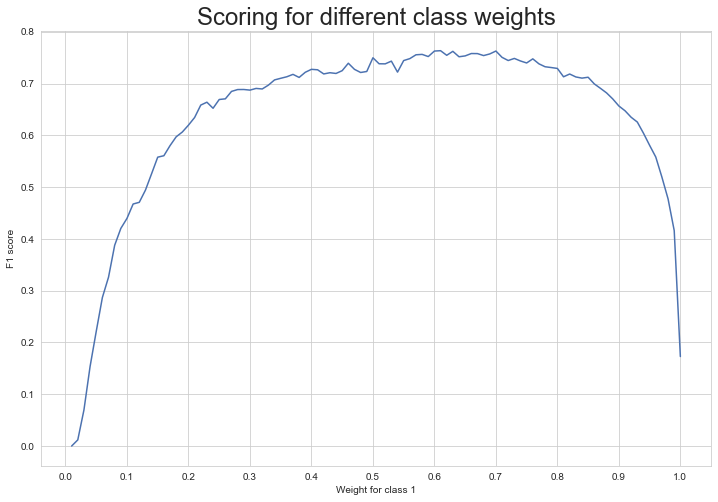

In [52]:
#Since there is a imbalance in terms of target variables distribution i.e. we have more observations that have 0 value than 1.
# using GridSearchCV to find out the best value to use for Class Weight

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

lr = LogisticRegression(random_state=4294967295, fit_intercept=True)

weights = np.linspace(0.0,0.99,100)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

Above exercise suggests that assigning a weight of 0.63/0.64 to class "1" of personal loan variable should yield us the best F1 Score.

#### I will be creating two models one with Class Weight Balanced and second with Class weight of 0.64 assigned.

In [53]:
#creating model with Class Weight Balanced.

logreg = LogisticRegression(random_state=4294967295, fit_intercept=True, class_weight='balanced')
#using class weight parameter to give more weight to class 1 as there are fewer instances of class in database
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=4294967295)

In [54]:
y_predict = logreg.predict(X_test)

In [55]:
model_score = logreg.score(X_test,y_test)
model_score

0.9173333333333333

In [56]:
#creating function for confusion matrix
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
def draw_cm( actual, predicted):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9231428571428572

Testing accuracy 0.9173333333333333

Confusion Matrix


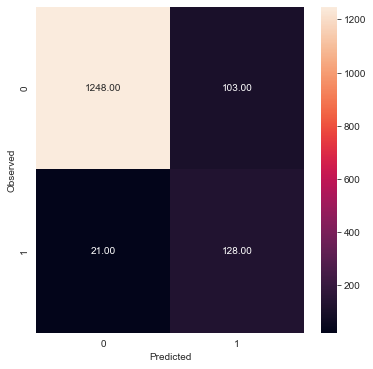

None

Recall: 0.8590604026845637

Precision: 0.5541125541125541

F1 Score: 0.6736842105263158

Roc Auc Score: 0.891410290165376


In [57]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [58]:
coef_lcdf = pd.DataFrame()
coef_lcdf['Coef'] = np.round(abs(logreg.coef_[0]),2)
coef_lcdf['Column'] = X_train.columns
coef_lcdf.to_csv(r'coff_df.csv')
coef_lcdf.sort_values(by='Coef',ascending=False)

,Coef,Column
476,4.90,CD Account_1
474,2.85,Education_3
26,2.40,ZIP Code_90049
473,2.32,Education_2
475,2.26,Securities Account_1
...,...,...
47,0.00,ZIP Code_90272
304,0.00,ZIP Code_94116
302,0.00,ZIP Code_94114
49,0.00,ZIP Code_90275


In [59]:
#combining predicted and observed values in a dataframe
z= X_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z.head()

,Age,Experience,Income,CCAvg,ZIP Code_90005,ZIP Code_90007,ZIP Code_90009,ZIP Code_90011,ZIP Code_90016,ZIP Code_90018,...,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Personal Loan,Predicted Personal Loan
2764,31.0,5.0,84.0,2.9,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4767,35.0,9.0,45.0,0.9,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3814,34.0,9.0,35.0,1.3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3499,49.0,23.0,114.0,0.3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2735,36.0,12.0,70.0,2.6,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [60]:
#rows where predicted class is not equal to observed class.
z[z['Observed Personal Loan'] != z['Predicted Personal Loan']]

,Age,Experience,Income,CCAvg,ZIP Code_90005,ZIP Code_90007,ZIP Code_90009,ZIP Code_90011,ZIP Code_90016,ZIP Code_90018,...,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Personal Loan,Predicted Personal Loan
932,51.0,27.0,112.0,1.8,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,0,1
2775,38.0,13.0,163.0,4.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2971,52.0,25.0,43.0,1.0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,0,1
1513,45.0,21.0,183.0,1.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3347,65.0,41.0,78.0,2.0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,50.0,25.0,130.0,1.1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2846,67.0,43.0,105.0,1.7,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
4737,61.0,36.0,85.0,1.8,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3641,59.0,35.0,74.0,2.3,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


#### Model 2 with Class weight of 0.64

In [61]:
logreg1 = LogisticRegression(random_state=4294967295, fit_intercept=True, class_weight={0:0.36,1:0.64})
#using class weight parameter to give more weight to class 1 as there are fewer instances of class in database
logreg1.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.36, 1: 0.64}, random_state=4294967295)

In [62]:
y_predict = logreg1.predict(X_test)

In [63]:
model_score = logreg1.score(X_test,y_test)
model_score

0.9533333333333334

Trainig accuracy 0.9608571428571429

Testing accuracy 0.9533333333333334

Confusion Matrix


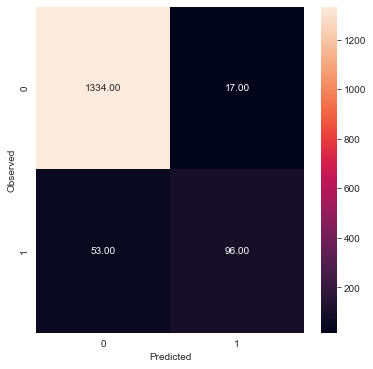

None

Recall: 0.6442953020134228

Precision: 0.8495575221238938

F1 Score: 0.732824427480916

Roc Auc Score: 0.8158560151813968


In [64]:
print("Trainig accuracy",logreg1.score(X_train,y_train))  
print()
print("Testing accuracy",logreg1.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

## Conclusion

#### Important Features
Based on the model training CD Account_1, Education_3, Education_2, Family_3 are important features for model training.

Mortgage had a coefficient value of close to 0 hence did not add much value to the model.

#### Important Metric

Given the problem statement, the Bank wants to improve customer engagement and get as many customers to take personal loan. In this case I would go with model 1 where although the F1 Score is low, Recall is pretty high. Meaning that bank would be able to target and convert more customers.

While model 2 gives a better F1 score, bank would only be able to get 96 customer vs 128 customers from model 1. Ofcourse in case of Model 1 the bank would spend more efforts as they would be going after more customers. It on Bank to decide...